<a href="https://colab.research.google.com/github/senasung37/startup_project/blob/main/%EA%B8%B0%EC%97%85%ED%98%91%EC%97%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B2%AC%EC%A0%81%EB%82%B4%EC%9A%A9NLP(%EB%B3%B4%EC%95%88%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 불러오기

In [86]:
#라이브러리
import pandas as pd
import requests
import numpy as np

#nlp 라이브러리
import re
import nltk
import spacy
from spacy.tokenizer import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [87]:
# 견적서 파일 df로 불러오기
df = pd.read_excel('견적서_변형.xlsx')
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,메모,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,NaN,NaN,NaN,NaN
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,NaN,NaN,NaN,NaN
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,NaN,NaN,NaN,NaN


In [88]:
df = df.iloc[:, :10]
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드


##데이터 전처리(NLP)

In [89]:
#테스트 행 삭제
df = df[df["분류"].str.contains('테스트') == False]
df


,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업
...,...,...,...,...,...,...,...,...,...,...
396,허준오,1,미디어세상,9000000.0,양천구청 캐릭터 제작,타이틀(3D),1,6000000,상업용 디자인,상업용 디자인
397,허준오,1,미디어세상,4200000.0,미디어 예술상회,로고 제작,1,300000,상업용 디자인,상업용 디자인
398,허준오,1,미디어세상,4200000.0,미디어 예술상회,타이틀/15초,1,2500000,미디어,미디어
399,허준오,0,오유정,4500000.0,MBC 방송 타이틀,FHD15초,1,3000000,미디어,미디어


In [90]:
#함수-특수기호, 공백제거

def clean_text(texts):
  #remove punctuation 
  new_text = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts))

  #remove number
  new_text = re.sub(r'\d+','', str(new_text))
  #remove extra space
  new_text = re.sub(r'\s+', ' ',new_text) 
  #remove spaces
  new_text = re.sub(r'\s+', ' ', new_text) 
  #remove space from start
  new_text = re.sub(r"^\s+", '', new_text) 
  #remove space from the end  
  new_text = re.sub(r'\s+$', '', new_text) 
  #lower case 
  new_text = new_text.lower() 
  #remove Html tags 
  #new_text = re.sub(r'<[^>]+>', '', new_text) 
  return new_text

In [91]:
#함수 - 토크나이징
def tokenizer(text):
  new_text = clean_text(text)
  new_text = new_text.split()
  return new_text

In [92]:
df['clean_text'] = df['항목명'].apply(clean_text)
df['tokens'] = df['clean_text'].apply(tokenizer)
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]"


In [93]:
#불용어 지정 
stopwords = ['및', '이', '1종', '겉', '인', '종', '명', '일', '건', '만원']

In [94]:
#불용어 제외, 영문 번역 토큰 생성
tokens = []

for lines in df['tokens']:    
    lst_tokens = []
    for token in lines:
        #토큰 불용어 아니면 저장
        if token not in stopwords:
          #영문토큰 한글로 통일
          if token == "app":
            lst_tokens.append("앱")
          elif token == "ppt":
            lst_tokens.append("피피티")
          elif token == "PPT":
            lst_tokens.append("피피티")
          elif token == "프레젠테이션":
            lst_tokens.append("피피티")
          elif token == "design":
            lst_tokens.append("디자인")
          elif token == "main":
            lst_tokens.append("메인")
          elif token == "vat":
            lst_tokens.append("수수료")
          else:
            lst_tokens.append(token)

    tokens.append(lst_tokens)
    
df['tokens_no_sw'] = tokens
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]"


In [95]:
#list to string 함수
def list_to_str(lst):
  lst = ' '.join(lst)
  return lst

#clean_text 전처리
df['clean_text'] = df['tokens_no_sw'].apply(list_to_str)

In [96]:
#단어 카운터
from collections import Counter
word_counts = Counter()

#불용어 제거 후 top10 words
df['tokens_no_sw'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

[('디자인', 37),
 ('제작', 16),
 ('웹싸이트', 15),
 ('피피티', 13),
 ('로고', 10),
 ('메이크업', 8),
 ('퍼블리싱', 8),
 ('개발', 7),
 ('홈페이지', 7),
 ('텀블러', 7),
 ('헤어', 7),
 ('메인페이지', 7),
 ('앱', 7),
 ('실크', 7),
 ('포스터', 6),
 ('배너', 6),
 ('재질', 6),
 ('시공', 5),
 ('작업', 5),
 ('인건비', 5),
 ('포토앨범용', 5),
 ('서버', 5),
 ('수정', 5),
 ('발행', 4),
 ('설치', 4),
 ('호스팅', 4),
 ('웹디자인', 4),
 ('부가세', 4),
 ('라벨', 4),
 ('도배', 4)]

In [97]:
#토큰 수, 빈도 순위, 존재 문서 수, 비율 등 정보

def word_count(docs):

    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [98]:
wc = word_count(df['tokens_no_sw'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
53,디자인,37,37,1.0,0.056489,0.056489,0.111446
11,제작,16,16,2.0,0.024427,0.080916,0.048193
42,웹싸이트,15,15,3.0,0.022901,0.103817,0.045181
52,피피티,13,13,4.0,0.019847,0.123664,0.039157
13,로고,10,10,5.0,0.015267,0.138931,0.030120
147,메이크업,8,8,6.0,0.012214,0.151145,0.024096
190,퍼블리싱,8,8,7.0,0.012214,0.163359,0.024096
18,개발,7,7,8.0,0.010687,0.174046,0.021084
47,홈페이지,7,7,9.0,0.010687,0.184733,0.021084
87,텀블러,7,7,10.0,0.010687,0.195420,0.021084


In [99]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt
import matplotlib as mpl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
# 한글 폰트 사용을 위해서 세팅
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('font', family='NanumBarunGothic')
mpl.rc('font', family='NanumBarunGothic')
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [101]:
#top20 단어
wc = word_count(df['tokens_no_sw'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
53,디자인,37,37,1.0,0.056489,0.056489,0.111446
11,제작,16,16,2.0,0.024427,0.080916,0.048193
42,웹싸이트,15,15,3.0,0.022901,0.103817,0.045181
52,피피티,13,13,4.0,0.019847,0.123664,0.039157
13,로고,10,10,5.0,0.015267,0.138931,0.030120
147,메이크업,8,8,6.0,0.012214,0.151145,0.024096
190,퍼블리싱,8,8,7.0,0.012214,0.163359,0.024096
18,개발,7,7,8.0,0.010687,0.174046,0.021084
47,홈페이지,7,7,9.0,0.010687,0.184733,0.021084
87,텀블러,7,7,10.0,0.010687,0.195420,0.021084


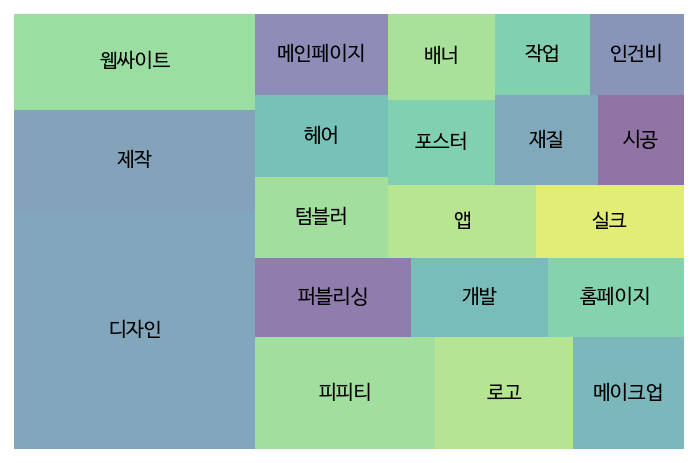

In [102]:
#스쿼리파이 top10 토큰 시각화 -> 한글깨짐 오류 -> 런타임 재시작으로 해결 
wc_top10 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.rc('font', family='NanumBarunGothic')
plt.axis('off')
plt.show()


##konlpy

In [103]:
#라이브러리 설치
!pip install konlpy 
import time
import konlpy
from konlpy.utils import pprint
from konlpy.tag import Hannanum, Kkma, Komoran, Okt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
#kkma 명사 추출
kkma = Kkma()
df['kkma_noun'] = df['clean_text'].apply(kkma.nouns)
df.head(5)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]","[영문, 영문기사, 기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드,블루베리 액기스,"[블루베리, 액기스]","[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]"
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업,문서작업,[문서작업],[문서작업],"[문서, 문서작업, 작업]"


In [105]:
#OKT 단어추출
Okt = Okt()
df['okt_noun'] = df['clean_text'].apply(Okt.nouns)
df.head(5)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun,okt_noun
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드,블루베리 액기스,"[블루베리, 액기스]","[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]"
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업,문서작업,[문서작업],[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]"


In [106]:
#Hannanum 단어추출
Han  = Hannanum()
df['han_noun'] = df['clean_text'].apply(Han.nouns)
df.head(5)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun,okt_noun,han_noun
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드,블루베리 액기스,"[블루베리, 액기스]","[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]"
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업,문서작업,[문서작업],[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업]


In [107]:
#komoran 단어추출
Kom  = Komoran()
df['kom_noun'] = df['clean_text'].apply(Kom.nouns)
df.head(5)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드,블루베리 액기스,"[블루베리, 액기스]","[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]",[블루베리]
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업,문서작업,[문서작업],[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업],"[문서, 작업]"


##모델성능 비교

In [108]:
#전체 비교
df.iloc[:, np.r_[4, 12, 13:17]]

,항목명,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun
0,영문기사 작성,"[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]"
1,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,블루베리 액기스,"[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]",[블루베리]
4,문서작업,[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업],"[문서, 작업]"
...,...,...,...,...,...,...
396,양천구청 캐릭터 제작,"[양천구청, 캐릭터, 제작]","[양천, 양천구청, 구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천, 구청, 캐릭터, 제작]"
397,미디어 예술상회,"[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]"
398,미디어 예술상회,"[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]"
399,MBC 방송 타이틀,"[mbc, 방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]"


In [109]:
#특이케이스 확인
df[df['유저명'].str.contains("채효곤")]

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun


In [110]:
wc = word_count(df['kkma_noun'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
71,디자인,51,51,1.0,0.050495,0.050495,0.153614
45,웹,21,21,2.0,0.020792,0.071287,0.063253
18,제작,19,19,3.0,0.018812,0.090099,0.057229
58,웹싸이트,15,15,4.0,0.014851,0.104950,0.045181
60,싸이트,15,15,5.0,0.014851,0.119802,0.045181
162,페이지,15,15,6.0,0.014851,0.134653,0.045181
20,로고,14,14,7.0,0.013861,0.148515,0.042169
74,티,14,14,8.0,0.013861,0.162376,0.042169
73,피,13,13,9.0,0.012871,0.175248,0.039157
72,피피티,13,13,10.0,0.012871,0.188119,0.039157


In [111]:
wc = word_count(df['okt_noun'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
61,디자인,47,47,1.0,0.058385,0.058385,0.141566
13,제작,19,19,2.0,0.023602,0.081988,0.057229
50,웹,16,16,3.0,0.019876,0.101863,0.048193
48,싸이트,15,15,4.0,0.018634,0.120497,0.045181
126,페이지,15,15,5.0,0.018634,0.139130,0.045181
15,로고,14,14,6.0,0.017391,0.156522,0.042169
60,피피티,13,13,7.0,0.016149,0.172671,0.039157
155,비,12,12,8.0,0.014907,0.187578,0.036145
10,작업,11,11,9.0,0.013665,0.201242,0.033133
195,메인,10,10,10.0,0.012422,0.213665,0.030120


In [112]:
wc = word_count(df['han_noun'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
53,디자인,37,37,1.0,0.060956,0.060956,0.111446
11,제작,16,16,2.0,0.026359,0.087315,0.048193
42,웹싸이트,15,15,3.0,0.024712,0.112026,0.045181
52,피피티,13,13,4.0,0.021417,0.133443,0.039157
13,로고,10,10,5.0,0.016474,0.149918,0.030120
139,메이크업,8,8,6.0,0.013180,0.163097,0.024096
177,퍼블리싱,8,8,7.0,0.013180,0.176277,0.024096
18,개발,7,7,8.0,0.011532,0.187809,0.021084
47,홈페이지,7,7,9.0,0.011532,0.199341,0.021084
82,텀블러,7,7,10.0,0.011532,0.210873,0.021084


In [113]:
wc = word_count(df['kom_noun'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
57,디자인,51,51,1.0,0.063591,0.063591,0.153614
48,웹,20,20,2.0,0.024938,0.088529,0.060241
12,제작,19,19,3.0,0.023691,0.112219,0.057229
46,싸이,15,15,4.0,0.018703,0.130923,0.045181
14,로고,14,14,5.0,0.017456,0.148379,0.042169
59,티,14,14,6.0,0.017456,0.165835,0.042169
126,페이지,14,14,7.0,0.017456,0.183292,0.042169
58,피,13,13,8.0,0.016209,0.199501,0.039157
9,작업,11,11,9.0,0.013716,0.213217,0.033133
158,비,10,10,10.0,0.012469,0.225686,0.030120


결론
- 라이브러리 안 쓴 토큰화, 라이브러리 kkma, okt, hannanum, komoran로 명사추출
    - kkma: 가장 잘게 쪼갬, 쓸데없는 단어들 많이 생성되고 중복단어들이 많아짐(유지보수→ 유지, 유지보수, 보수)
    - okt: 상당히 잘게 쪼개기 때문에 쓸데없는 단어들(ex 홈페이지 -> 페이지)이 생성되기도 함
    - Hannanum: 준수한 수준, 그러나 띄어쓰기 안된 경우 명사추출 X
    - Komoran: kkma보단 낫지만 잘게 쪼갬, 쓸데없는 단어들 많이 생성됨
    - 명사추출 라이브러리 사용 X: 단어  위주로 작성된 문서이기 때문에 성능 괜찮음

##불용어 처리

In [114]:
#불용어 지정 
stopwords = ['및', '이', '1종', '겉', '인', '종', '명', '일', '건', '비', '배', '티', '싱', '수', '리', '싱', '포', '피', '장', '레', '테', '션', '거', '지', '만원']

In [115]:
#불용어 제거
tokens = []
df2 = df.iloc[:, np.r_[12, 13:17]]
cols = df2.columns
cols

Index(['tokens_no_sw', 'kkma_noun', 'okt_noun', 'han_noun', 'kom_noun'], dtype='object')

In [116]:
#불용어 제거
for col in cols:
  for lines in df[col]:
    lst_tokens = []
    for token in lines:
      # 토큰이 불용어가 아니면 저장
      if token in stopwords:
        lines.remove(token)

df[cols]

,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun
0,"[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]"
1,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,"[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]",[블루베리]
4,[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업],"[문서, 작업]"
...,...,...,...,...,...
396,"[양천구청, 캐릭터, 제작]","[양천, 양천구청, 구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천, 구청, 캐릭터, 제작]"
397,"[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]"
398,"[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]"
399,"[mbc, 방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]"


In [117]:
#top20 단어
wc = word_count(df['tokens_no_sw'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
53,디자인,37,37,1.0,0.056662,0.056662,0.111446
11,제작,16,16,2.0,0.024502,0.081164,0.048193
42,웹싸이트,15,15,3.0,0.022971,0.104135,0.045181
52,피피티,13,13,4.0,0.019908,0.124043,0.039157
13,로고,10,10,5.0,0.015314,0.139357,0.030120
147,메이크업,8,8,6.0,0.012251,0.151608,0.024096
190,퍼블리싱,8,8,7.0,0.012251,0.163859,0.024096
18,개발,7,7,8.0,0.010720,0.174579,0.021084
47,홈페이지,7,7,9.0,0.010720,0.185299,0.021084
87,텀블러,7,7,10.0,0.010720,0.196018,0.021084


In [118]:
#불용어 제거 후 성능
wc = word_count(df['okt_noun'])
wc.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
61,디자인,47,47,1.0,0.059873,0.059873,0.141566
13,제작,19,19,2.0,0.024204,0.084076,0.057229
50,웹,16,16,3.0,0.020382,0.104459,0.048193
48,싸이트,15,15,4.0,0.019108,0.123567,0.045181
125,페이지,15,15,5.0,0.019108,0.142675,0.045181
15,로고,14,14,6.0,0.017834,0.160510,0.042169
60,피피티,13,13,7.0,0.016561,0.177070,0.039157
10,작업,11,11,8.0,0.014013,0.191083,0.033133
191,메인,10,10,9.0,0.012739,0.203822,0.030120
21,개발,9,9,10.0,0.011465,0.215287,0.027108


In [119]:
df.iloc[:, np.r_[4, 12, 13:17]].head(50)

,항목명,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun
0,영문기사 작성,"[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]"
1,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]"
2,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]"
3,블루베리 액기스,"[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]",[블루베리]
4,문서작업,[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업],"[문서, 작업]"
5,녹음시스템,[녹음시스템],"[녹음, 녹음시스템, 시스템]","[녹음, 시스템]",[녹음시스템],"[녹음, 시스템]"
6,포스터 제작,"[포스터, 제작]","[포스터, 제작]","[포스터, 제작]","[포스터, 제작]","[포스터, 제작]"
7,로고 제작,"[로고, 제작]","[로고, 제작]","[로고, 제작]","[로고, 제작]","[로고, 제작]"
8,인테리어,[인테리어],[인테리어],[인테리어],[인테리어],[인테리어]
9,인테리어,[인테리어],[인테리어],[인테리어],[인테리어],[인테리어]


In [120]:
cols

Index(['tokens_no_sw', 'kkma_noun', 'okt_noun', 'han_noun', 'kom_noun'], dtype='object')

In [121]:
wc_tk = word_count(df['tokens_no_sw'])
wc_tk = wc_tk.rename(columns={"word": "word_tk"})
wc_tk.reset_index(drop=True, inplace=True)
wc_tk.head(20)

,word_tk,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,디자인,37,37,1.0,0.056662,0.056662,0.111446
1,제작,16,16,2.0,0.024502,0.081164,0.048193
2,웹싸이트,15,15,3.0,0.022971,0.104135,0.045181
3,피피티,13,13,4.0,0.019908,0.124043,0.039157
4,로고,10,10,5.0,0.015314,0.139357,0.030120
5,메이크업,8,8,6.0,0.012251,0.151608,0.024096
6,퍼블리싱,8,8,7.0,0.012251,0.163859,0.024096
7,개발,7,7,8.0,0.010720,0.174579,0.021084
8,홈페이지,7,7,9.0,0.010720,0.185299,0.021084
9,텀블러,7,7,10.0,0.010720,0.196018,0.021084


In [122]:
wc_kkma = word_count(df['kkma_noun'])
wc_kkma = wc_kkma.rename(columns={"word": "word_kkma"})
wc_kkma.reset_index(drop=True, inplace=True)
wc_kkma.head(20)

,word_kkma,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,디자인,51,51,1.0,0.054255,0.054255,0.153614
1,웹,21,21,2.0,0.022340,0.076596,0.063253
2,제작,19,19,3.0,0.020213,0.096809,0.057229
3,웹싸이트,15,15,4.0,0.015957,0.112766,0.045181
4,싸이트,15,15,5.0,0.015957,0.128723,0.045181
5,페이지,15,15,6.0,0.015957,0.144681,0.045181
6,로고,14,14,7.0,0.014894,0.159574,0.042169
7,피피티,13,13,8.0,0.013830,0.173404,0.039157
8,작업,11,11,9.0,0.011702,0.185106,0.033133
9,메인,10,10,10.0,0.010638,0.195745,0.030120


In [123]:
wc_okt = word_count(df['okt_noun'])
wc_okt = wc_okt.rename(columns={"word": "word_okt"})
wc_okt.reset_index(drop=True, inplace=True)
wc_okt.head(20)

,word_okt,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,디자인,47,47,1.0,0.059873,0.059873,0.141566
1,제작,19,19,2.0,0.024204,0.084076,0.057229
2,웹,16,16,3.0,0.020382,0.104459,0.048193
3,싸이트,15,15,4.0,0.019108,0.123567,0.045181
4,페이지,15,15,5.0,0.019108,0.142675,0.045181
5,로고,14,14,6.0,0.017834,0.160510,0.042169
6,피피티,13,13,7.0,0.016561,0.177070,0.039157
7,작업,11,11,8.0,0.014013,0.191083,0.033133
8,메인,10,10,9.0,0.012739,0.203822,0.030120
9,개발,9,9,10.0,0.011465,0.215287,0.027108


In [124]:
wc_han = word_count(df['han_noun'])
wc_han = wc_han.rename(columns={"word": "word_han"})
wc_han.reset_index(drop=True, inplace=True)
wc_han.head(20)

,word_han,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,디자인,37,37,1.0,0.061258,0.061258,0.111446
1,제작,16,16,2.0,0.026490,0.087748,0.048193
2,웹싸이트,15,15,3.0,0.024834,0.112583,0.045181
3,피피티,13,13,4.0,0.021523,0.134106,0.039157
4,로고,10,10,5.0,0.016556,0.150662,0.030120
5,메이크업,8,8,6.0,0.013245,0.163907,0.024096
6,퍼블리싱,8,8,7.0,0.013245,0.177152,0.024096
7,개발,7,7,8.0,0.011589,0.188742,0.021084
8,홈페이지,7,7,9.0,0.011589,0.200331,0.021084
9,텀블러,7,7,10.0,0.011589,0.211921,0.021084


In [125]:
wc_kom = word_count(df['kom_noun'])
wc_kom = wc_kom.rename(columns={"word": "word_kom"})
wc_kom.reset_index(drop=True, inplace=True)
wc_kom.head(20)

,word_kom,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,디자인,51,51,1.0,0.068000,0.068000,0.153614
1,웹,20,20,2.0,0.026667,0.094667,0.060241
2,제작,19,19,3.0,0.025333,0.120000,0.057229
3,싸이,15,15,4.0,0.020000,0.140000,0.045181
4,로고,14,14,5.0,0.018667,0.158667,0.042169
5,페이지,14,14,6.0,0.018667,0.177333,0.042169
6,티,13,13,7.0,0.017333,0.194667,0.039157
7,작업,11,11,8.0,0.014667,0.209333,0.033133
8,메인,10,10,9.0,0.013333,0.222667,0.030120
9,개발,8,8,10.0,0.010667,0.233333,0.024096


In [126]:
df_wc = pd.concat([wc_tk['word_tk'], wc_kkma['word_kkma'], wc_okt['word_okt'], wc_han['word_han'], wc_kom['word_kom']], axis=1)
df_wc.head(50)

,word_tk,word_kkma,word_okt,word_han,word_kom
0,디자인,디자인,디자인,디자인,디자인
1,제작,웹,제작,제작,웹
2,웹싸이트,제작,웹,웹싸이트,제작
3,피피티,웹싸이트,싸이트,피피티,싸이
4,로고,싸이트,페이지,로고,로고
5,메이크업,페이지,로고,메이크업,페이지
6,퍼블리싱,로고,피피티,퍼블리싱,티
7,개발,피피티,작업,개발,작업
8,홈페이지,작업,메인,홈페이지,메인
9,텀블러,메인,개발,텀블러,개발


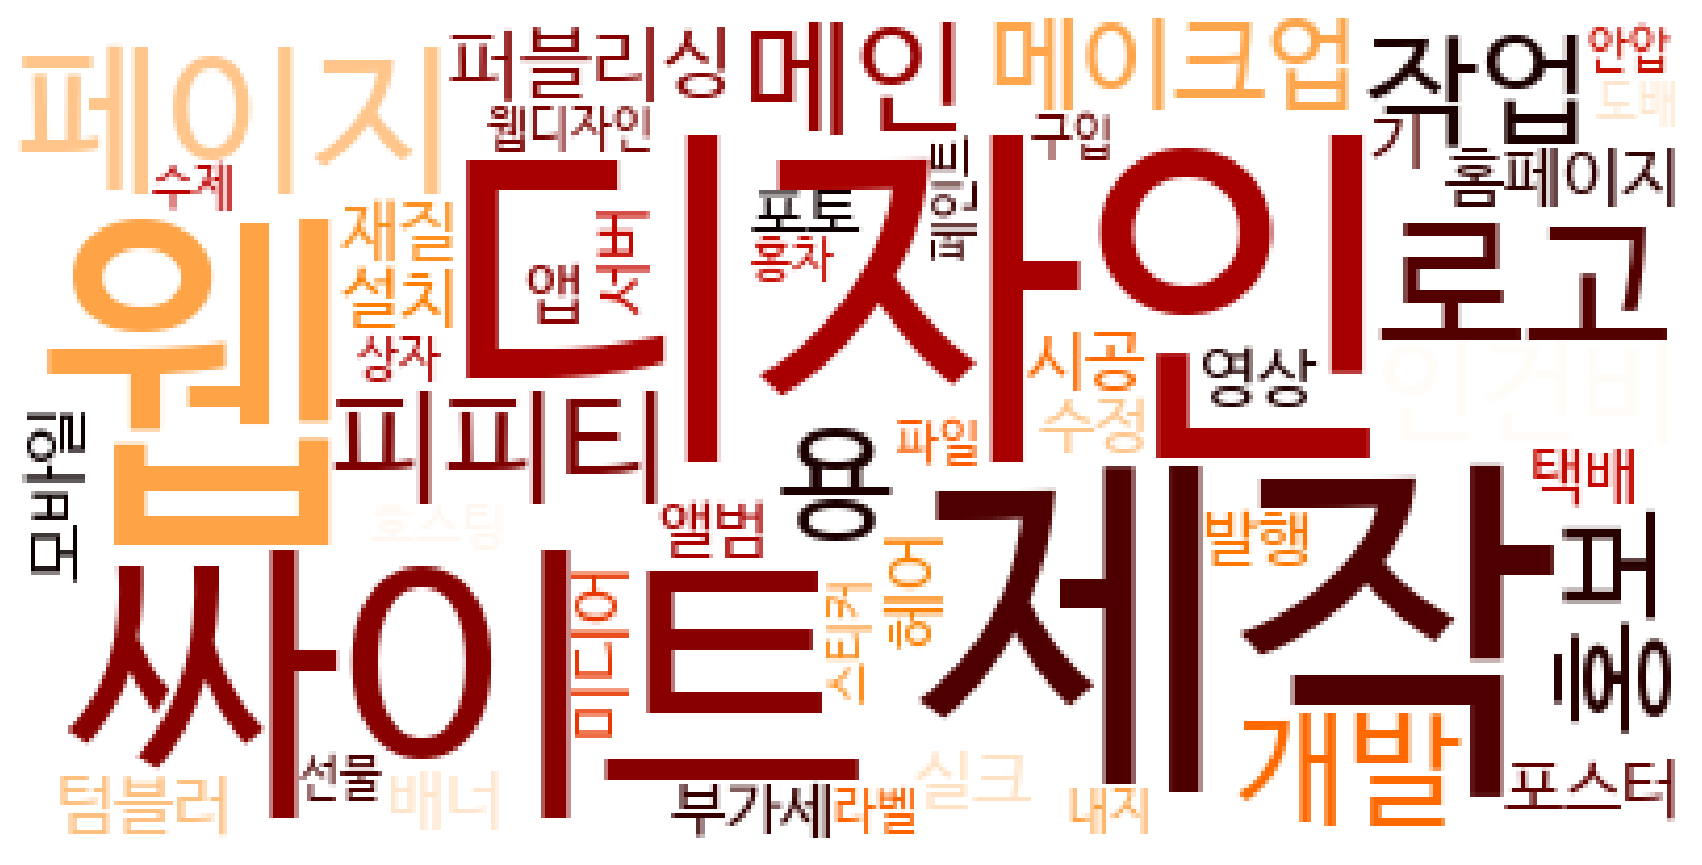

In [127]:
#워드클라우드
from wordcloud import WordCloud
feature_names = wc_okt['word_okt'].values
wcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',max_words=50, background_color='white', colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[:]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

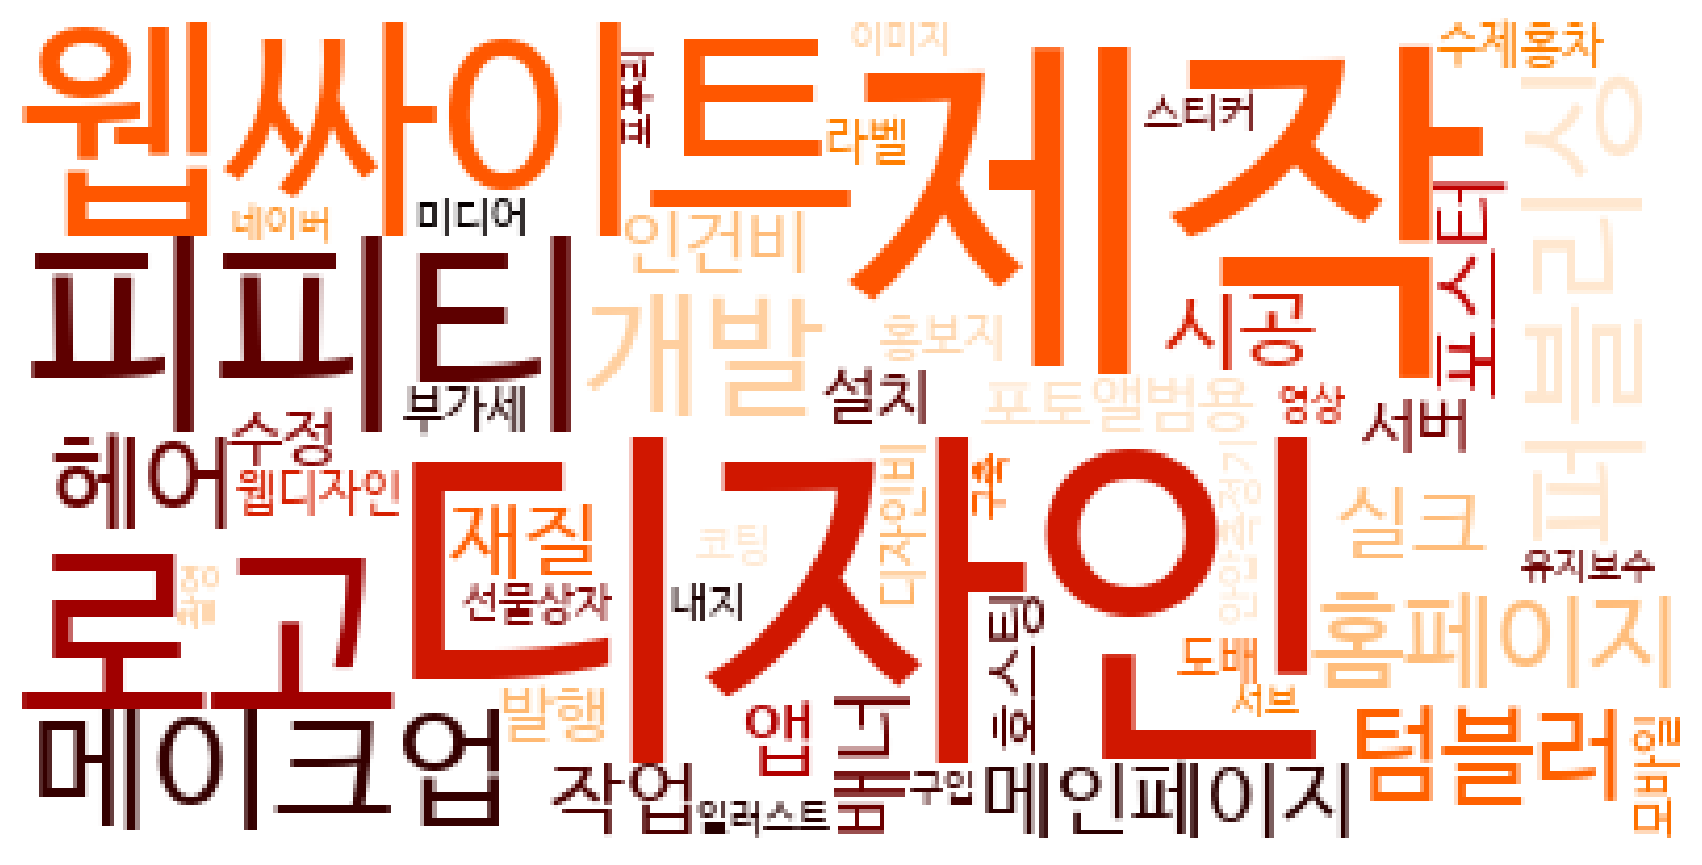

In [128]:
#워드클라우드
from wordcloud import WordCloud
feature_names = wc_tk['word_tk'].values
wcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',max_words=50, background_color='white', colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[:]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

#Clustering

In [129]:
#Libraries for preprocessing
#code from:https://towardsdatascience.com/clustering-product-names-with-python-part-1-f9418f8705c8
%matplotlib inline
import plotly.express as px
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer

!pip install webcolors
import webcolors

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
df['okt_noun_str'] = df['okt_noun'].apply(list_to_str)

In [131]:
df['okt_noun_str']

0         영문 기사 작성
1        신문사 기사 발행
2           김치찌개 팩
3         블루베리 액기스
4            문서 작업
          ...     
396    양천구청 캐릭터 제작
397      미디어 예술 상회
398      미디어 예술 상회
399         방송 타이틀
400           관리 기
Name: okt_noun_str, Length: 332, dtype: object

In [132]:
#okt 명사추출 열
text = df['okt_noun_str']

In [133]:
#bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text)

In [134]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text)

In [135]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text)

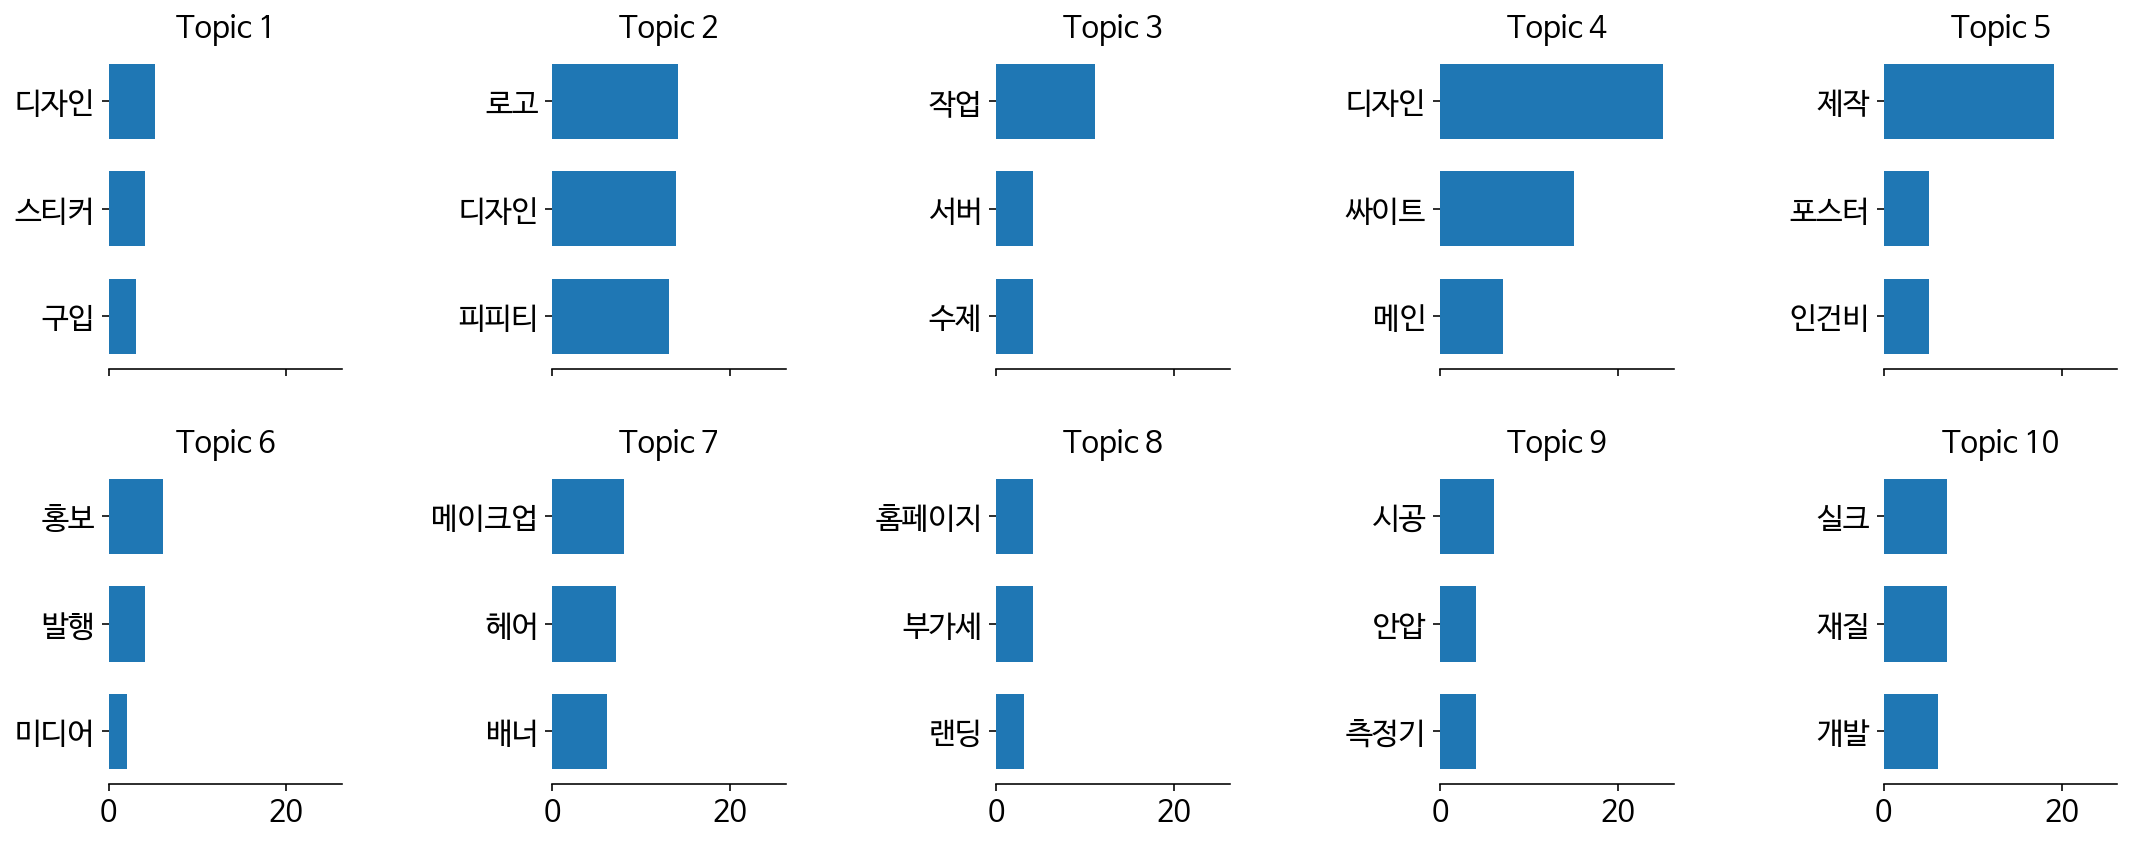

In [136]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. 
#Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 3
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

In [137]:
#한나눔 명사추출 열
df['han_noun_str'] = df['han_noun'].apply(list_to_str)

In [138]:
df['han_noun_str']

0          영문기사 작성
1        신문사 기사 발행
2           김치찌개 팩
3         블루베리 액기스
4             문서작업
          ...     
396    양천구청 캐릭터 제작
397       미디어 예술상회
398       미디어 예술상회
399         방송 타이틀
400            관리기
Name: han_noun_str, Length: 332, dtype: object

In [139]:
text = df['han_noun_str']

In [140]:
#bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text)

In [141]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text)

In [142]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text)

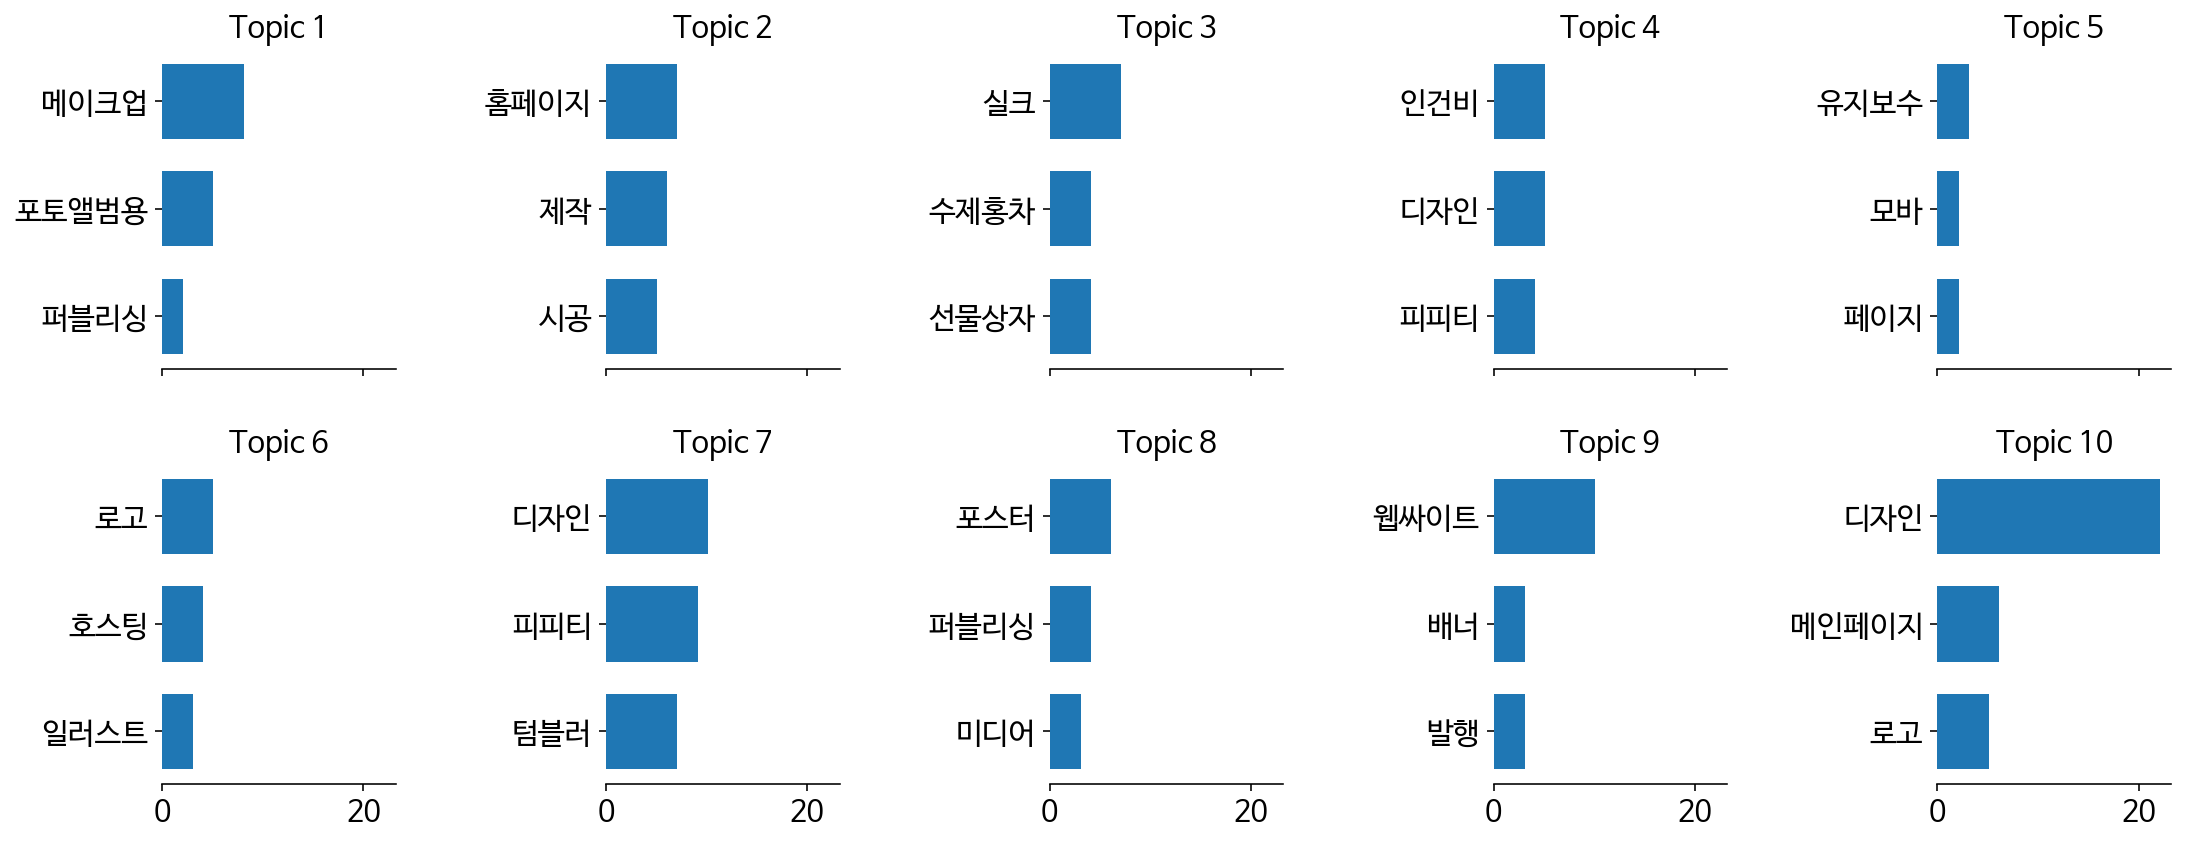

In [143]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 3
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

#스펠링 체크

##라이브러리

In [144]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git
from pykospacing import Spacing
from hanspell import spell_checker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-87ee432d
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-87ee432d
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-ggog4f4r
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-ggog4f4r


##Hanspell

In [145]:
#hanspell
def han_spell_check(x):
  x = x.strip() # 113-114 \t
  res = spell_checker.check(x)
  result = res.checked
  return result

In [146]:
df['clen_text_hansp'] = df['clean_text'].apply(han_spell_check)
df

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,clean_text,tokens,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun,okt_noun_str,han_noun_str,clen_text_hansp
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,영문기사 작성,"[영문기사, 작성]","[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]",영문 기사 작성,영문기사 작성,영문 기사 작성
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,신문사 기사 발행,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]",신문사 기사 발행,신문사 기사 발행,신문사 기사 발행
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,김치찌개 팩,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]",김치찌개 팩,김치찌개 팩,김치찌개 팩
3,James,1,자운재,8250000.0,블루베리 액기스,얼큰 50g*2ea,1000,3000,건강/미용,푸드,블루베리 액기스,"[블루베리, 액기스]","[블루베리, 액기스]","[블루, 블루베리, 베리, 액기]","[블루베리, 액기스]","[블루베리, 액기스]",[블루베리],블루베리 액기스,블루베리 액기스,블루베리 진액
4,강예호,0,고객,600000.0,문서작업,매절,100,4000,비즈니스,문서작업,문서작업,[문서작업],[문서작업],"[문서, 문서작업, 작업]","[문서, 작업]",[문서작업],"[문서, 작업]",문서 작업,문서작업,문서작업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,허준오,1,미디어세상,9000000.0,양천구청 캐릭터 제작,타이틀(3D),1,6000000,상업용 디자인,상업용 디자인,양천구청 캐릭터 제작,"[양천구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천, 양천구청, 구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천구청, 캐릭터, 제작]","[양천, 구청, 캐릭터, 제작]",양천구청 캐릭터 제작,양천구청 캐릭터 제작,양천구청 캐릭터 제작
397,허준오,1,미디어세상,4200000.0,미디어 예술상회,로고 제작,1,300000,상업용 디자인,상업용 디자인,미디어 예술상회,"[미디어, 예술상회]","[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]",미디어 예술 상회,미디어 예술상회,미디어 예술상회
398,허준오,1,미디어세상,4200000.0,미디어 예술상회,타이틀/15초,1,2500000,미디어,미디어,미디어 예술상회,"[미디어, 예술상회]","[미디어, 예술상회]","[미디어, 예술, 예술상회, 상회]","[미디어, 예술, 상회]","[미디어, 예술상회]","[미디어, 예술, 상회]",미디어 예술 상회,미디어 예술상회,미디어 예술상회
399,허준오,0,오유정,4500000.0,MBC 방송 타이틀,FHD15초,1,3000000,미디어,미디어,mbc 방송 타이틀,"[mbc, 방송, 타이틀]","[mbc, 방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]","[방송, 타이틀]",방송 타이틀,방송 타이틀,mbc 방송 타이틀


In [147]:
text = df['clen_text_hansp']

In [148]:
#bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text)

In [149]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text)

In [150]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text)

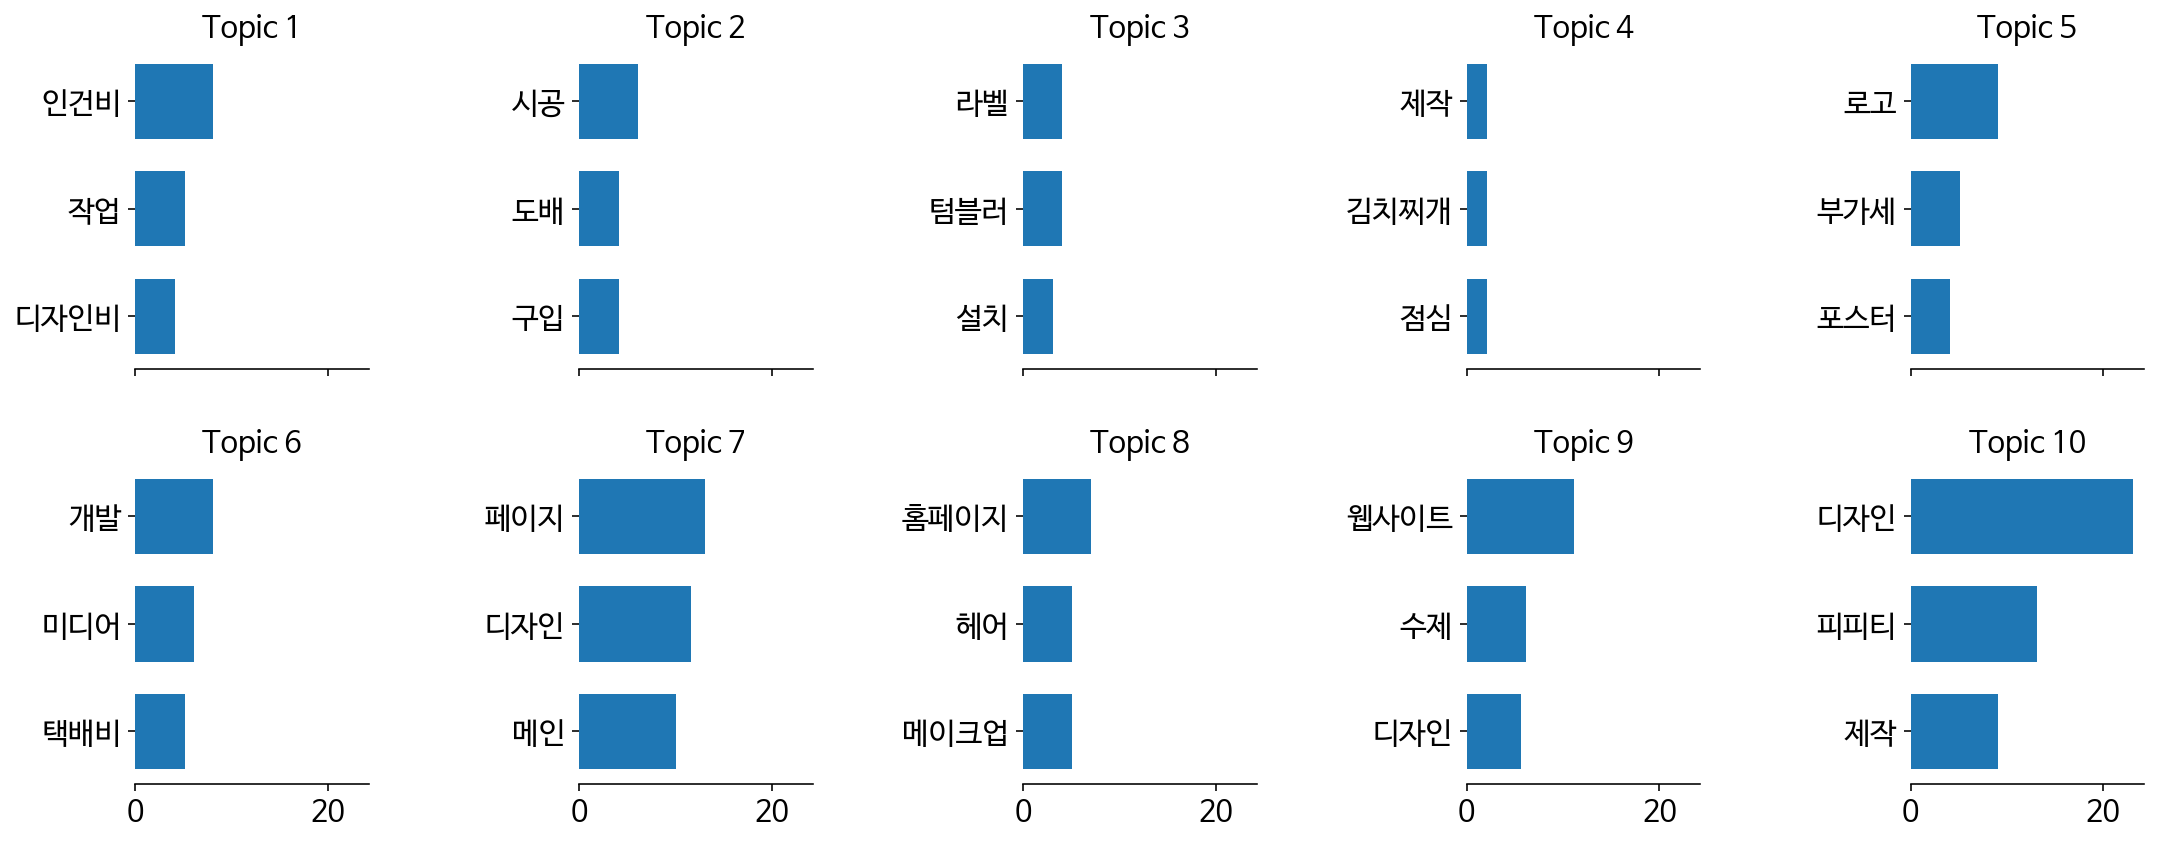

In [151]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 3
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

##Pykospacing

In [152]:
#pykospacing
spacing = Spacing()

In [153]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [154]:
#pykospacing 적용
df['clean_text_pyko'] = df['clen_text_hansp'].apply(spacing)

In [155]:
text = df['clean_text_pyko']

In [156]:
#bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text)

In [157]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text)

In [158]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text)

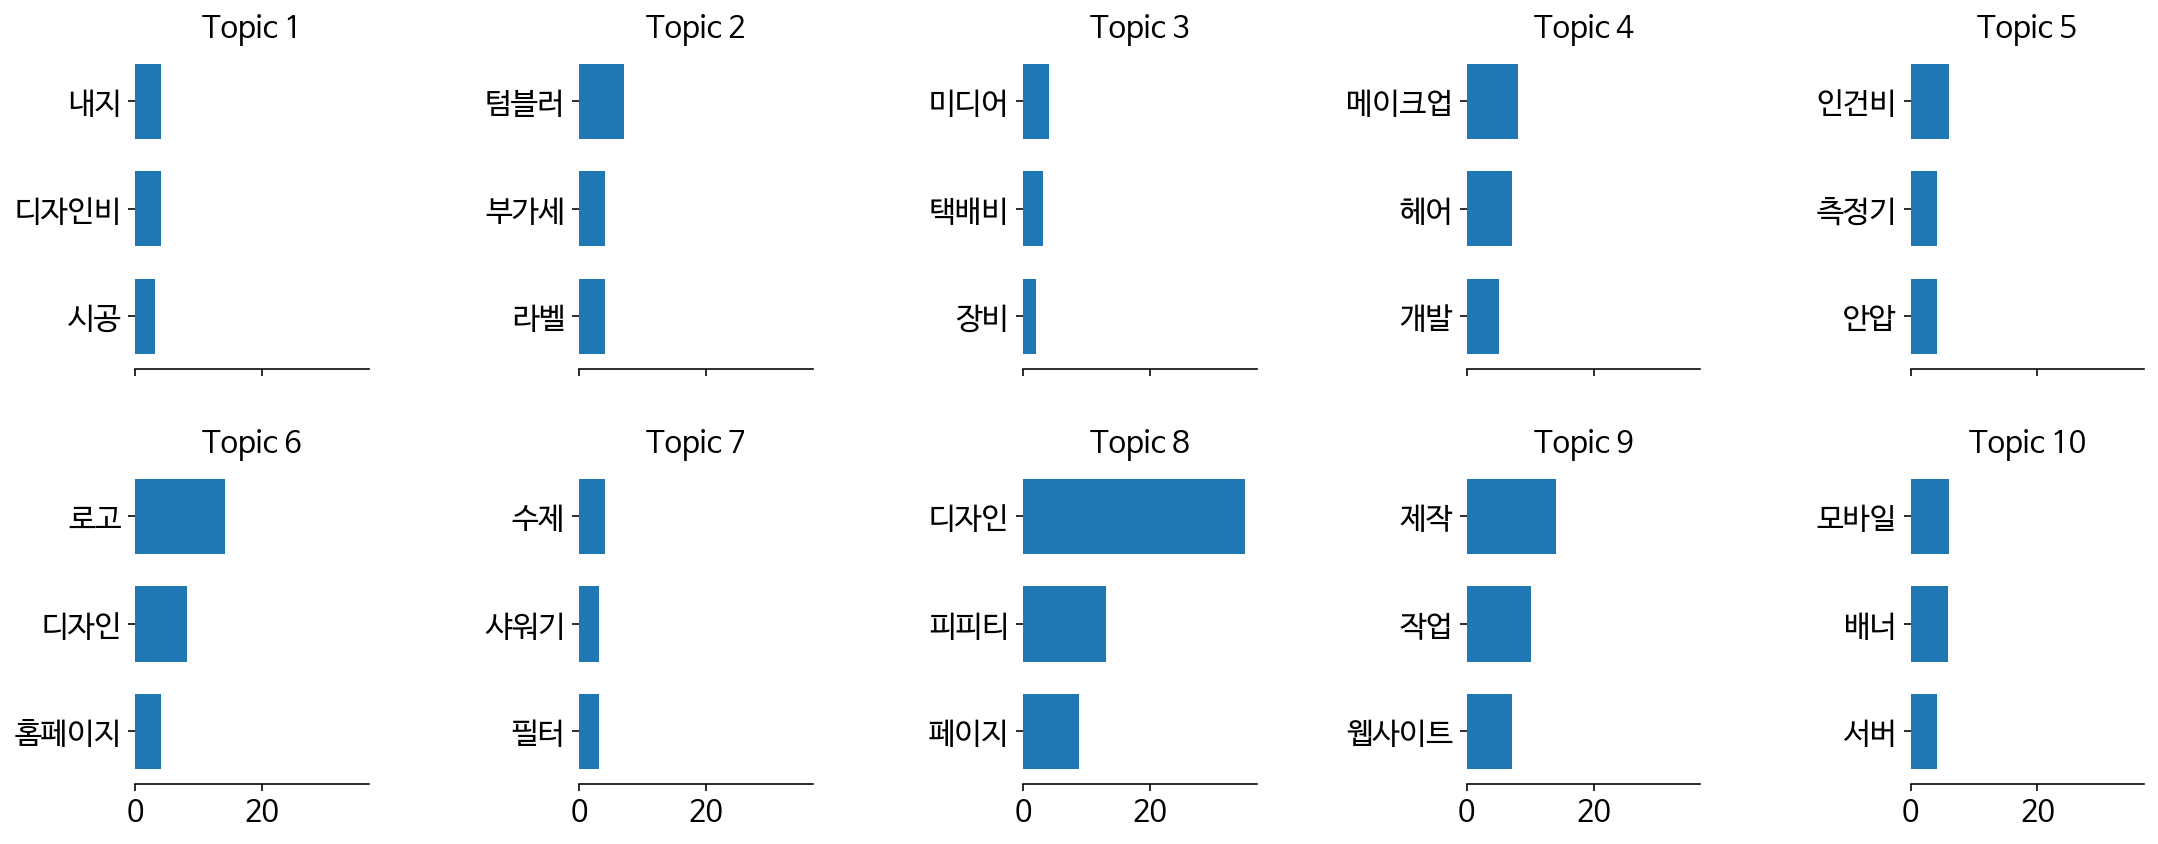

In [159]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 3
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

##시각화

In [160]:
df['clean_text_pyko2'] = df['clean_text_pyko'].apply(tokenizer)

In [161]:
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,...,tokens_no_sw,kkma_noun,okt_noun,han_noun,kom_noun,okt_noun_str,han_noun_str,clen_text_hansp,clean_text_pyko,clean_text_pyko2
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,...,"[영문기사, 작성]","[영문, 영문기사, 기사, 작성]","[영문, 기사, 작성]","[영문기사, 작성]","[영문, 기사, 작성]",영문 기사 작성,영문기사 작성,영문 기사 작성,영문 기사 작성,"[영문, 기사, 작성]"
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,...,"[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]","[신문사, 기사, 발행]",신문사 기사 발행,신문사 기사 발행,신문사 기사 발행,신문사 기사 발행,"[신문사, 기사, 발행]"
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,...,"[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]","[김치찌개, 팩]",김치찌개 팩,김치찌개 팩,김치찌개 팩,김치찌개 팩,"[김치찌개, 팩]"


In [162]:
#top20 단어
wc_pyko = word_count(df['clean_text_pyko2'])
wc_pyko.head(20)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
59,디자인,43,43,1.0,0.054088,0.054088,0.129518
13,제작,19,19,2.0,0.023899,0.077987,0.057229
48,웹사이트,15,15,3.0,0.018868,0.096855,0.045181
137,페이지,15,15,4.0,0.018868,0.115723,0.045181
15,로고,14,14,5.0,0.017610,0.133333,0.042169
58,피피티,13,13,6.0,0.016352,0.149686,0.039157
10,작업,10,10,7.0,0.012579,0.162264,0.030120
208,메인,10,10,8.0,0.012579,0.174843,0.030120
22,개발,8,8,9.0,0.010063,0.184906,0.024096
150,인건비,8,8,10.0,0.010063,0.194969,0.024096


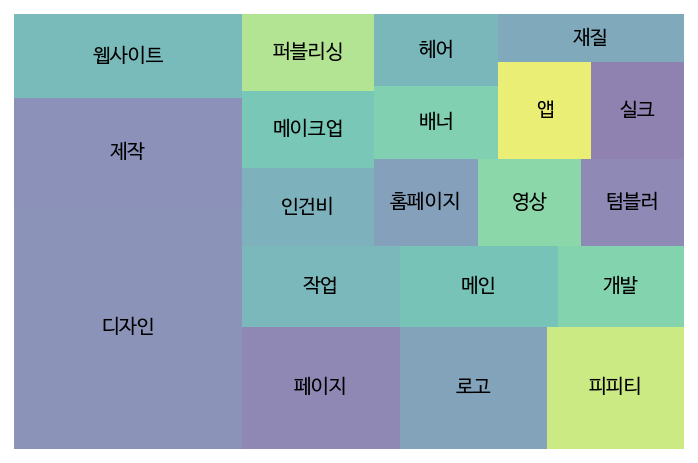

In [163]:
#top20 단어 시각화
wc_top20 = wc_pyko[wc_pyko['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.rc('font', family='NanumBarunGothic')
plt.axis('off')
plt.show()

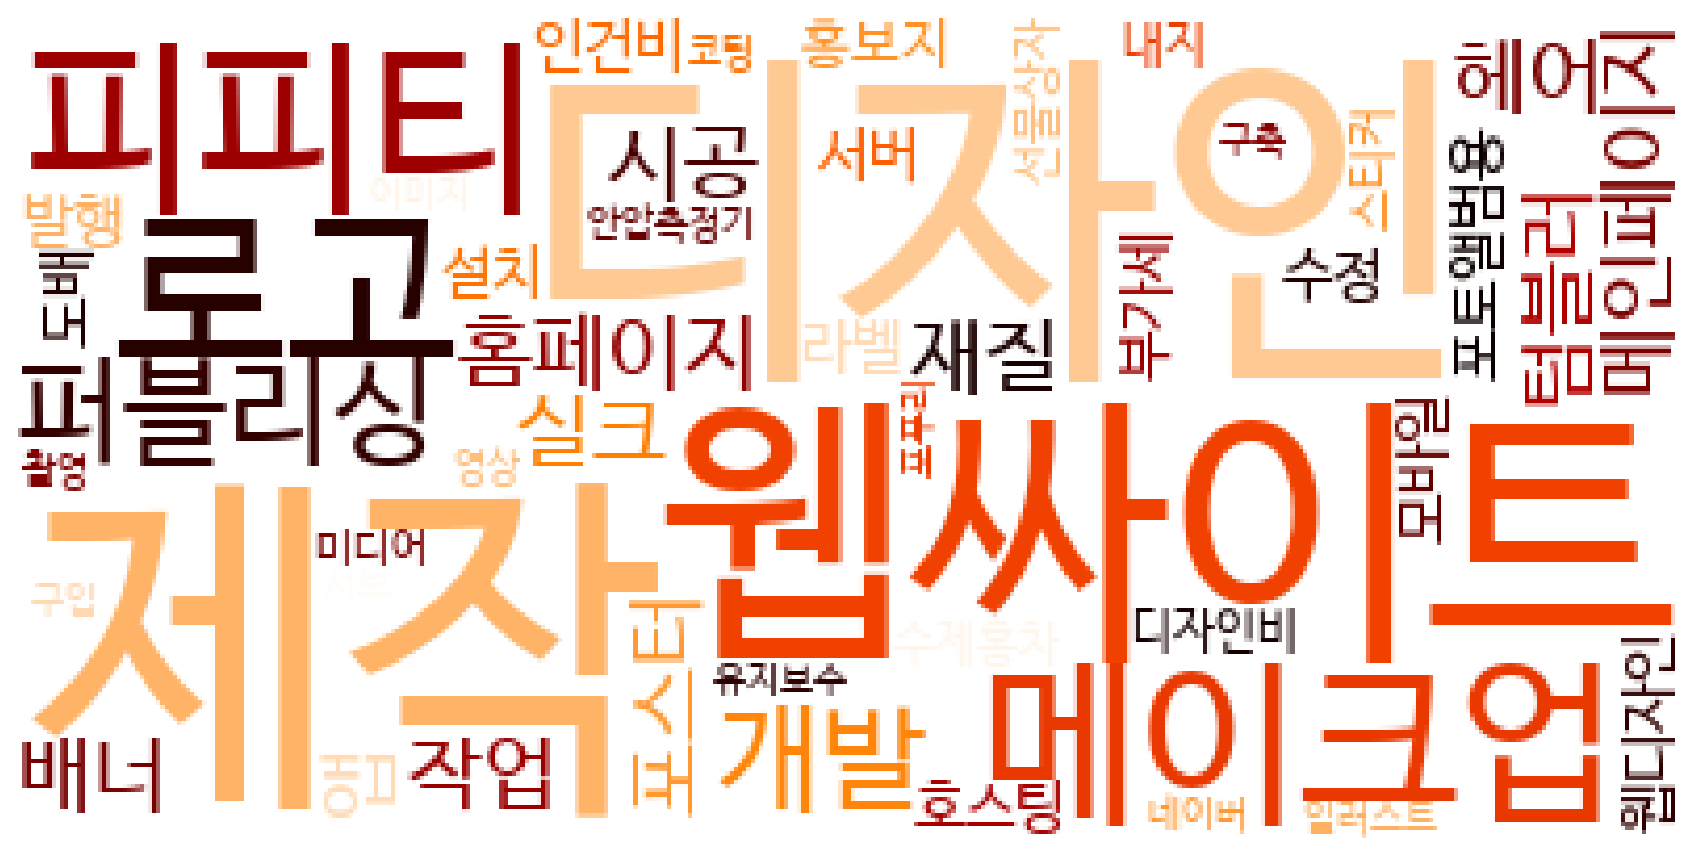

In [164]:
#워드클라우드
from wordcloud import WordCloud
feature_names = wc_tk['word_tk'].values
wcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',max_words=50, background_color='white', colormap = 'gist_heat')
wcloud.generate(' '.join(word for word in feature_names[:]))
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(wcloud)

In [165]:
df['clean_text_pyko3'] = df['clean_text_pyko2'].apply(list_to_str)

In [166]:
text = df['clean_text_pyko3']

In [167]:
#bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text)

In [168]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text)

In [169]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text)

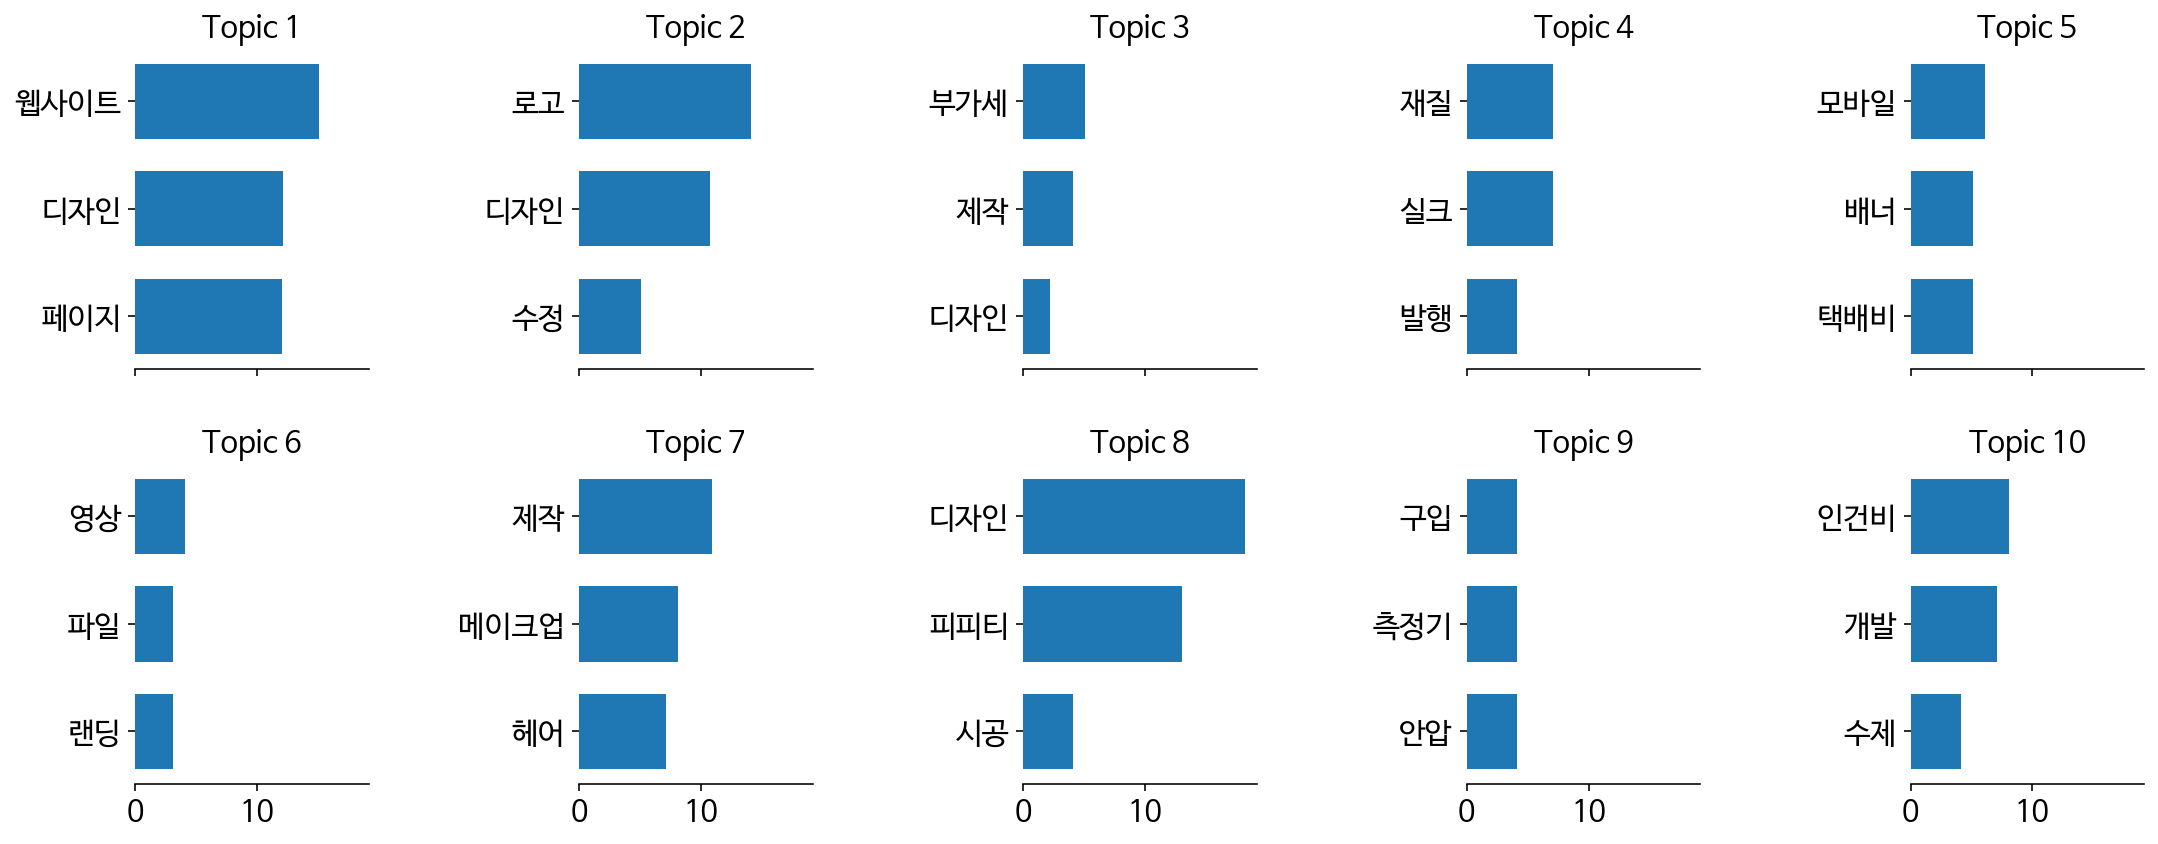

In [170]:
#LDA
lda = LatentDirichletAllocation(n_components=10, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(18, 6), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)
    plt.rc('font', family='NanumBarunGothic')
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 3
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')